In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.stats import norm

import numpy as np
import pickle

from src.prediction import construct_predictions
from src.utils import gather_data



## Load ND data we want to analyse

- **Width** data is a 4D array "indexed" by
(delta, module, dimension, trial)
    - Here data for *one* delta only 



In [18]:
"""
    Load the ND data, 
    which we want to analyze
"""  

path_to_data = "./data/m_k_normal"
W = gather_data(path_to_data, "width")




W        = W[0,:,:,:]
log_mean = np.mean(np.log(W), axis=2)
log_std  = np.std(np.log(W), axis=2)

print(f"W shape is {W.shape} indexed by module number, dimension, trial")

W shape is (9, 4, 60) indexed by module number, dimension, trial


## Construct predictions from 1d data

- **Width** data for prediction again is a 4D array "indexed" by
(delta, module, dimension, trial)
    - Here we need data for 1D only 
- **Prediction** is computed from log 1D data and will spit out a 3D array "indexed" by (modules, dimensions, delta)

In [21]:
path_to_data = "./data/benchmark_normal"

X = gather_data(path_to_data)
X = X[:, :, 0, :]
X = np.swapaxes(X, 0, 1)

logX       = np.log(X)
prediction = construct_predictions(logX[:,:], 
                                   ms=range(1,9 + 1), #No. of modules
                                   ks=range(1,7 + 1), #Input dim
                                   ps=range(5),       #Index into phase resolution subarray
                                   raw=False)

print(f"Prediction shape is {prediction.shape}")

Prediction shape is (9, 7, 5)


## Figure 3a, 3b

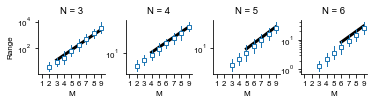

In [23]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})
fig, axes = plt.subplots(figsize=(5., 1.25), ncols=4, sharey=False,  tight_layout = {"pad": 0})

ms     = np.arange(1,10)
ks     = np.array([3,4,5,6])

axes[0].set_ylabel("Range")
for i,ax in enumerate(axes):

    ax.set_title("N = {}".format(ks[i]))
    ax.set_xticks(ms)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("M")
    ax.set_yscale("log")

    ax.set_xticks(ms)
    ax.set_xlim(0.5,ms[-1]+.5)

    
    k  = ks[i]
    k_ = i

    
    valid = np.where(ms>=k)[0]

    
    ax.plot(ms[valid], prediction[valid,k - 1,1], 
                color="black",
                linewidth= 3,
                linestyle="-",
            alpha=1.,
                marker="None", markersize=8 , markerfacecolor="cyan") 

    valid = np.where(2*ms>=k)[0] 
    a = np.exp(log_mean - 2*log_std)[valid,k_]
    b = np.exp(log_mean)[valid,k_]
    c = np.exp(log_mean + 2*log_std)[valid,k_]
            
    ax.plot( [ms[valid],ms[valid]] ,[a,c], linewidth=1.,color="C0",linestyle="-", alpha=1.)
    ax.plot(ms[valid], b, 
            marker="s", color="C0", 
            markerfacecolor= "white",
            markersize=4,
            markeredgewidth=1.,
            linewidth=.5, 
            linestyle="none")
    

plt.savefig("./Figures/Fig3a_Capacity.pdf", dpi=300, transparent=False)


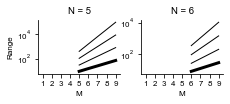

In [24]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})
fig, axes = plt.subplots(figsize=(3., 1.25), ncols=2, sharey=False,  tight_layout = {"pad": 0})

ms     = np.arange(1,10)
ks     = np.array([5,6])

axes[0].set_ylabel("Range")
for i,ax in enumerate(axes):

    ax.set_title("N = {}".format(ks[i]))
    ax.set_xticks(ms)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("M")
    ax.set_yscale("log")
    ax.set_xticks(ms)
    ax.set_xlim(0.5,ms[-1]+.5)

    
    k     = ks[i]
    valid = np.where(ms>=k)[0]
    for d in range(1,5):
        l = 3. if d == 1 else 1
        c = "black" 
        ax.plot(ms[valid], prediction[valid,k - 1,d], 
                color=c,
                linewidth= l,
                linestyle="-",
                marker="None", markersize=2 , markerfacecolor="black") 


plt.savefig("./Figures/Fig3b_Capacity.pdf", dpi=300, transparent=False)


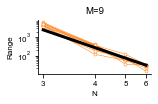

In [25]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})
fig, ax = plt.subplots(figsize=(2., 1.25), ncols=1, sharey=False,  tight_layout = {"pad": 0})


m  = 9
ks = np.array([3,4,5,6])


ax.set_title("M={}".format(m))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("N")
ax.set_ylabel("Range")
ax.set_yscale("log")

ax.set_xticks(1 - 1./ks)
ax.set_xticklabels(ks)




p = prediction[m - 1,ks-1,1]
f = W[m-1,:,:]


ax.plot(1 - 1./ks, p, 
                color="black",
                linestyle="-",
               marker="None", linewidth=3,
                alpha=1., zorder=1000)


for t in range(50,60):
    ax.plot(1 - 1./ks, f[:,t], 
            color="C1",
            linestyle="-",
               marker="o",
            markerfacecolor="white",
            markeredgewidth=0.5,
            markersize=3,
            linewidth=0.5,
                alpha=1., zorder=-1000)


plt.savefig("./Figures/Fig4a_Trade_Off.pdf", dpi=300, transparent=False)

  